In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (20,7)

In [ ]:
def clean_trade_dataset(df):
    """
    Takes the df as provided by the imf and returns it as a clean and usable dataframe
    """
    df_transposed = df.iloc[5:,1:].T
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.iloc[1:, :]
    df_transposed.rename(columns={np.nan: "Year"}, inplace=True)
    df_transposed["Year"] = df_transposed["Year"].astype("int")
    df_transposed = df_transposed.set_index("Year")
    return df_transposed

def get_trade_activity(country_i, country_j):
    X_i_j = dict_export[country_i][[country_j]].rename(columns={country_j: f"Export to {country_j}"})
    X_i = dict_export[country_i][["World"]].rename(columns={"World": f"Global Export {country_i}"})
    X_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Export {country_j}"})
    M_i_j = dict_import[country_i][[country_j]].rename(columns={country_j: f"Import from {country_j}"})
    M_i = dict_import[country_i][["World"]].rename(columns={"World": f"Global Import {country_i}"})
    M_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Import {country_j}"})
    W_i_j = pd.concat([X_i_j, X_i, M_i_j, M_i, X_j, M_j], axis=1)
    W_i_j["Trade Intensity"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    return W_i_j

def get_trade_activity(country_i, country_j):
    """
    Takes 2 countries as input
    Returns a dataframe with trade activity between these two countries
    X_i_j: export from country i to j
    X_i: total global export from country i
    M_i_j: import from country i to j
    M_i: total global import from country i
    """
    X_i_j = dict_export[country_i][[country_j]].rename(columns={country_j: f"Export to {country_j}"})
    X_i = dict_export[country_i][["World"]].rename(columns={"World": f"Global Export {country_i}"})
    X_j = dict_export[country_j][["World"]].rename(columns={"World": f"Global Export {country_j}"})
    M_i_j = dict_import[country_i][[country_j]].rename(columns={country_j: f"Import from {country_j}"})
    M_i = dict_import[country_i][["World"]].rename(columns={"World": f"Global Import {country_i}"})
    M_j = dict_import[country_j][["World"]].rename(columns={"World": f"Global Import {country_j}"})
    W_i_j = pd.concat([X_i_j, X_i, M_i_j, M_i, X_j, M_j], axis=1)
    W_i_j["Trade Intensity"] = (W_i_j[f"Export to {country_j}"] + W_i_j[f"Import from {country_j}"]) / (W_i_j[f"Global Export {country_i}"] + W_i_j[f"Global Import {country_i}"] + W_i_j[f"Global Export {country_j}"] + W_i_j[f"Global Import {country_j}"])
    return W_i_j
    
    

## GDP of Countries

In [2]:
path_real_GDP = "data_StatApp/imf/NominalGDP.xls"
xls_realGDP = pd.ExcelFile(path_real_GDP)
realGDP = pd.read_excel(xls_realGDP, 'Sheet1')

In [3]:
realGDP = realGDP.set_index("Year")
realGDP = realGDP.replace("...", np.nan)
for column in realGDP.columns:
    realGDP = realGDP.astype({column:'float'})

In [4]:
realGDP.head()

,"Afghanistan, Islamic Rep. of",Albania,Algeria,"Andorra, Principality of",Angola,Anguilla,Antigua and Barbuda,Argentina,"Armenia, Rep. of","Aruba, Kingdom of the Netherlands",Australia,Austria,"Azerbaijan, Rep. of","Bahamas, The","Bahrain, Kingdom of",Bangladesh,Barbados,"Belarus, Rep. of",Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Rep.,Chad,Chile,"China, P.R.: Hong Kong","China, P.R.: Macao","China, P.R.: Mainland",Colombia,"Comoros, Union of the","Congo, Dem. Rep. of the","Congo, Rep. of",Costa Rica,Côte d'Ivoire,"Croatia, Rep. of",Cyprus,Czech Rep.,Denmark,Djibouti,Dominica,Dominican Rep.,Ecuador,"Egypt, Arab Rep. of",El Salvador,"Equatorial Guinea, Rep. of","Eritrea, The State of","Estonia, Rep. of","Eswatini, Kingdom of","Ethiopia, The Federal Dem. Rep. of",Euro Area,"Fiji, Rep. of",Finland,France,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,"Iran, Islamic Rep. of",Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,"Kazakhstan, Rep. of",Kenya,Kiribati,"Korea, Rep. of","Kosovo, Rep. of",Kuwait,Kyrgyz Rep.,Lao People's Dem. Rep.,Latvia,Lebanon,"Lesotho, Kingdom of",Liberia,Libya,Lithuania,Luxembourg,"Madagascar, Rep. of",Malawi,Malaysia,Maldives,Mali,Malta,"Marshall Islands, Rep. of the","Mauritania, Islamic Rep. of",Mauritius,Mexico,"Micronesia, Federated States of","Moldova, Rep. of",Mongolia,Montenegro,Montserrat,Morocco,"Mozambique, Rep. of",Myanmar,Namibia,"Nauru, Rep. of",Nepal,"Netherlands, The",New Zealand,Nicaragua,Niger,Nigeria,"North Macedonia, Republic of",Norway,Oman,Pakistan,"Palau, Rep. of",Panama,Papua New Guinea,Paraguay,Peru,Philippines,"Poland, Rep. of",Portugal,Romania,Russian Federation,Rwanda,Samoa,"San Marino, Rep. of","São Tomé and Príncipe, Dem. Rep. of",Saudi Arabia,Senegal,"Serbia, Rep. of",Seychelles,Sierra Leone,Singapore,Slovak Rep.,"Slovenia, Rep. of",Solomon Islands,Somalia,South Africa,"South Sudan, Rep. of",Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,St. Vincent and the Grenadines,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Rep.,"Tajikistan, Rep. of","Tanzania, United Rep. of",Thailand,"Timor-Leste, Dem. Rep. of",Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,"Uzbekistan, Rep. of",Vanuatu,Vietnam,West Bank and Gaza,"Yemen, Rep. of",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173.308892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521654.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249870.0,NaN,NaN,NaN,NaN,Na

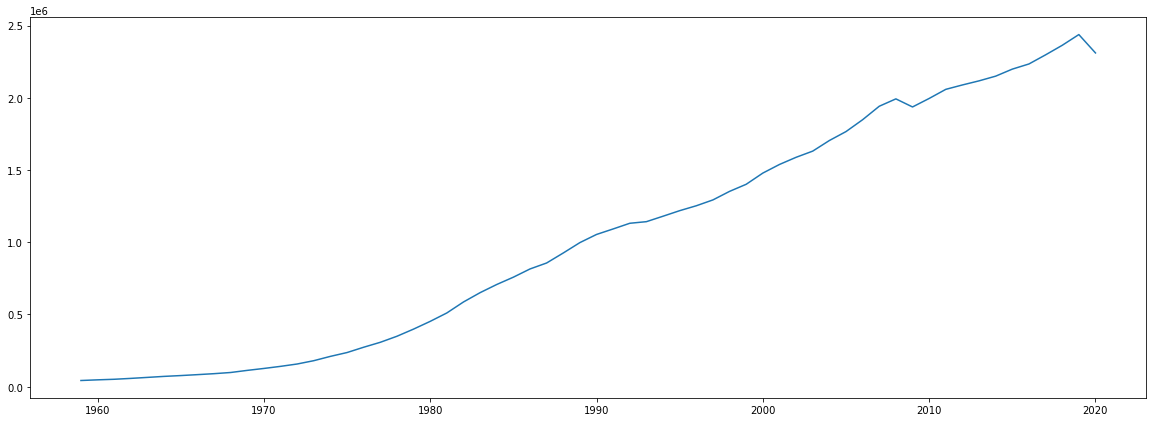

In [5]:
plt.plot(realGDP.France)

## Trade Activity

For each country, we get the export and import with other countries and store them into dictionnaries

In [60]:
list_countries = ["Australia", "France", "Germany", "Switzerland", "UnitedStates", "Canada", "UnitedKingdom"]
dict_paths = {}
dict_xls = {}
dict_export = {}
dict_import = {}

for country in list_countries:
    dict_paths[country] = f"data_StatApp/imf/trade/{country}.xls"
    dict_xls[country] = pd.ExcelFile(dict_paths[country])
    dict_export[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[0])
    dict_export[country] = clean_trade_dataset(dict_export[country])
    dict_import[country] = pd.read_excel(dict_xls[country], dict_xls[country].sheet_names[1])
    dict_import[country] = clean_trade_dataset(dict_import[country])


WARNING *** file size (533543) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (510790) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (516104) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (503994) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (536840) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [124]:
W_France_Germany_function = get_trade_activity("France", "Germany")

In [125]:
W_France_Germany_function.head()

Unnamed: 1,Export to Germany,Global Export France,Import from Germany,Global Import France,Global Export Germany,Global Import Germany,Trade Intensity
Year,,,,,,,
1960,943.2,6753.8,990.3,6065.6,11381.0,10013.0,0.056513
1961,1095.6,7099.5,1139.9,6488.2,12648.0,10882.0,0.060227
1962,1271.9,7225.5,1324.2,7315.2,13235.0,12240.0,0.064877
1963,1341.5,7926.6,1572.2,8523.9,14587.0,12952.0,0.066236
1964,1565.4,8804.3,1846.5,9899.2,16176.0,14635.0,0.068907
